In [15]:
#import the neccessary modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

In [10]:
#load csv file
vgs = pd.read_csv('http://bit.ly/vgsales')

# Checking the data

In [14]:
#check Video Game Sales information
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [4]:
#Drop nan values
vgs.dropna(how="any",inplace = True)
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [5]:
#view types of csv file

type(vgs)

pandas.core.frame.DataFrame

In [6]:
#Group Sales in Each Location by Year
vgs.groupby('Year')['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales' ].count()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,9,9,9,9,9
1981.0,46,46,46,46,46
1982.0,36,36,36,36,36
1983.0,17,17,17,17,17
1984.0,14,14,14,14,14
1985.0,14,14,14,14,14
1986.0,21,21,21,21,21
1987.0,16,16,16,16,16
1988.0,15,15,15,15,15


# Visualizations

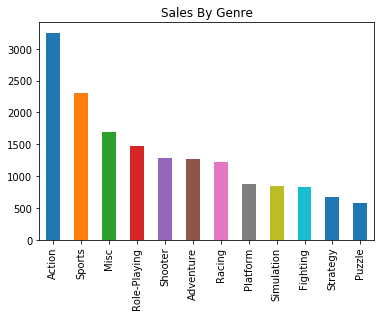

In [7]:
#Total Sales by Genre in Bar Graph Form

vgs.Genre.value_counts().plot(kind='bar', title='Sales By Genre')



<html>
<b>    
    <font color=purple>Sales by Genre</font> shows me that <font color=purple>Action</font> games sell the most and <font color=purple>Puzzle</font> games sell the least.
    </b>   
    </html>

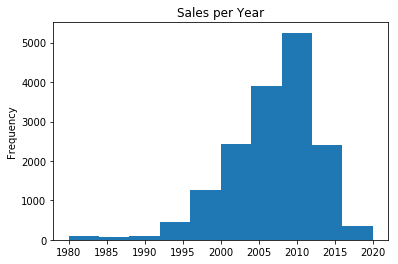

In [8]:
#Plot a histogram showing Sales per year

vgs.Year.plot(kind='hist', title= 'Sales per Year')

<html>
<b>    
<font color=purple>This histogram shows that the largest number of sales were in the year 2009.
</font>
    </b>   
    </html>

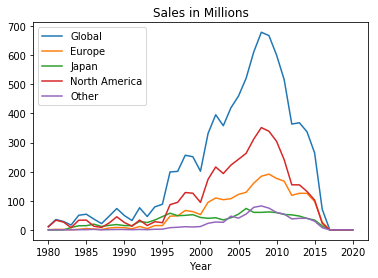

In [12]:
all_sales = vgs.groupby('Year').agg({'Global_Sales': np.sum, 'NA_Sales': np.sum, 'EU_Sales': np.sum, 'JP_Sales': np.sum, 'Other_Sales': np.sum})
plt.plot(all_sales.Global_Sales, label='Global')
plt.plot(all_sales.EU_Sales, label='Europe')
plt.plot(all_sales.JP_Sales, label='Japan')
plt.plot(all_sales.NA_Sales, label='North America')
plt.plot(all_sales.Other_Sales, label='Other')
plt.legend(loc='upper left')
plt.title('Sales in Millions')
plt.xlabel('Year')
plt.show()

<html>
<b>    
<font color=red>North America </font>accounts for the majority of sales, although there was initially, a closer comparison between regions. 
    </b>   
    </html>

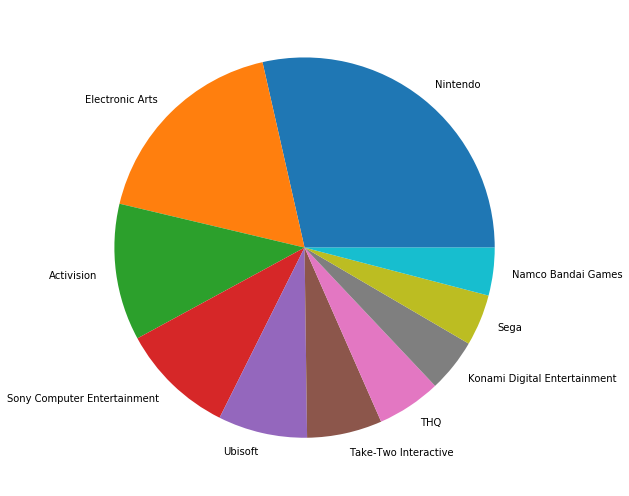

In [13]:
f,ax=plt.subplots(1,1,figsize=(17,7))
vgs.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[:10].plot.pie()
ax.set_ylabel("")
plt.tight_layout()

<html>
<b>   
Of Top 10 Sales by Platform, <font color=blue>Nintendo</font> is the top seller, followed by <font color=orange>Electronic Arts</font>.
    </b>   
    </html>

# Random Statistics

In [17]:
vgs.Global_Sales.mean()

0.5374406555006628

In [18]:
vgs.Global_Sales.std()

1.5550279355699124

In [19]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000
